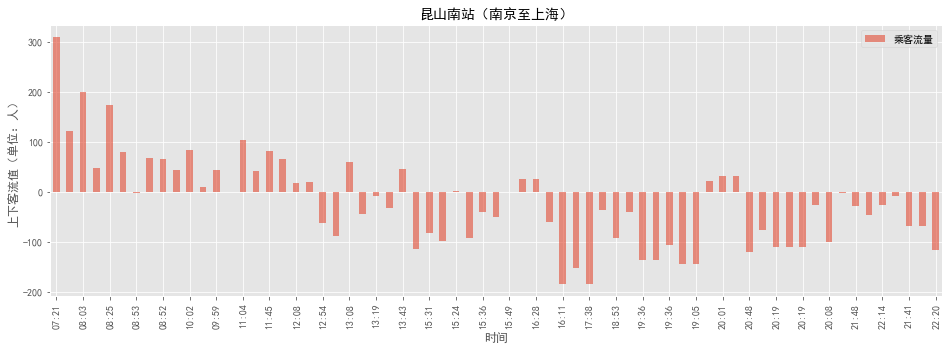

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_neighbor = pd.read_csv(r'../../file/subject/station_ana.csv')
df_to_kunshan = df_neighbor[df_neighbor['到达站'].str.contains('昆山')]
df_from_kunshan = df_neighbor[df_neighbor['发车站'].str.contains('昆山')]
df_kunshan = pd.merge(df_to_kunshan,df_from_kunshan,on='编号')
df_kunshan['乘客流量'] = df_kunshan['余票总数_x'] - df_kunshan['余票总数_y']
df_kunshan_use = df_kunshan[['发车时间_x','乘客流量']]
plt.rcParams['font.sans-serif']=['SimHei']#显示中文字体为黑体
plt.rcParams['axes.unicode_minus']=False#显示负号
plt.style.use('ggplot')
df_kunshan_use.plot(x='发车时间_x',y='乘客流量',kind='bar',figsize=(16,5),alpha=0.6)
plt.xticks([i for i in range(len(df_kunshan_use))][::(len(df_kunshan_use)//24)],
           df_kunshan_use['发车时间_x'][::(len(df_kunshan_use)//24)])
plt.xlabel('时间',size=12)
plt.ylabel('上下客流值（单位：人）',size=12)
plt.title('昆山南站（南京至上海）',size=14)
plt.show()

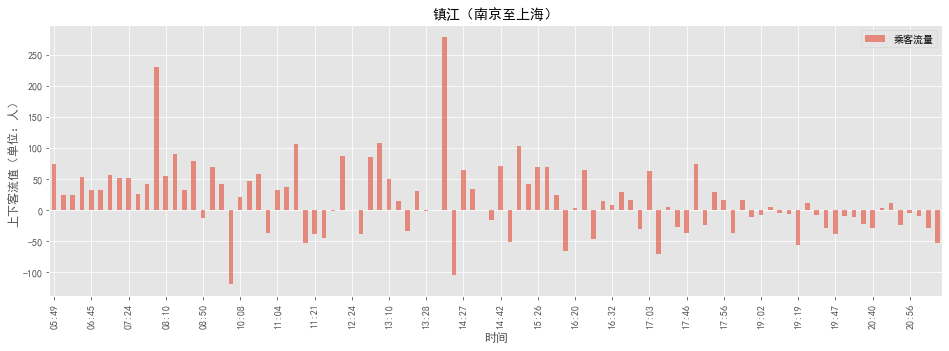

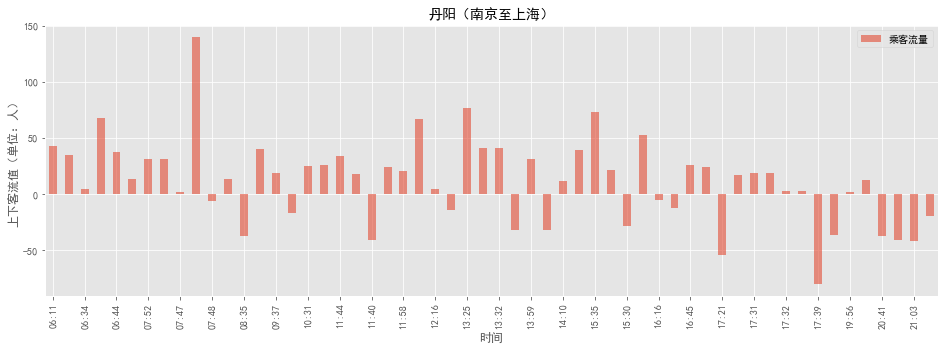

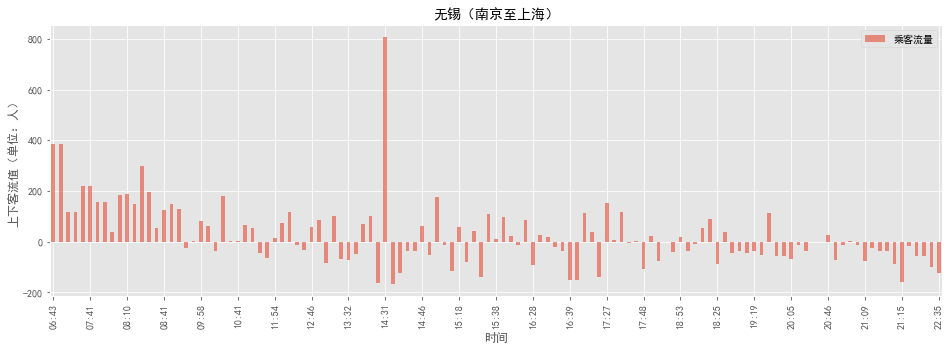

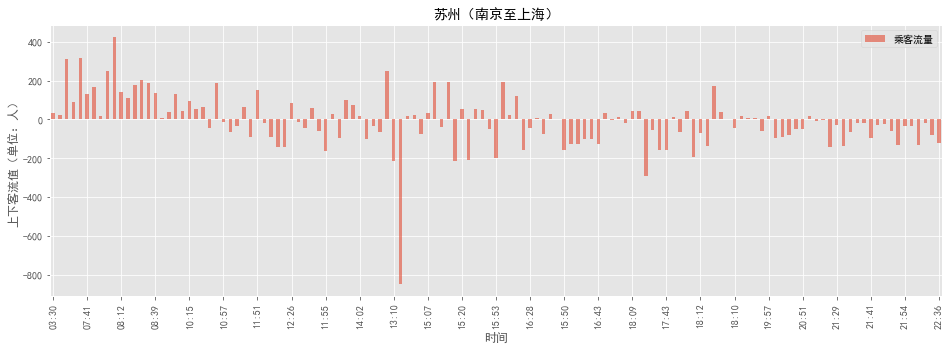

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']#显示中文字体为黑体
plt.rcParams['axes.unicode_minus']=False#显示负号
plt.style.use('ggplot')
%matplotlib inline

def to_plot(station): 
    df_neighbor = pd.read_csv(r'../../file/subject/station_ana.csv')
    df_to = df_neighbor[df_neighbor['到达站'].str.contains(station)]
    df_from = df_neighbor[df_neighbor['发车站'].str.contains(station)]
    df = pd.merge(df_to,df_from,on='编号')
    df['乘客流量'] = df['余票总数_x'] - df['余票总数_y']
    df_use = df[['发车时间_x','乘客流量']]
    df_use.plot(x='发车时间_x',y='乘客流量',kind='bar',figsize=(16,5),alpha=0.6)
    plt.xticks([i for i in range(len(df_use))][::(len(df_use)//24)],
           df_use['发车时间_x'][::(len(df_use)//24)])
    plt.xlabel('时间',size=12)
    plt.ylabel('上下客流值（单位：人）',size=12)
    plt.title('{}（南京至上海）'.format(station),size=14)
    plt.show()
    
if __name__ == '__main__':
    stations = ['镇江','丹阳','无锡','苏州']
#     stations = ['昆山']    
    for station in stations:
        to_plot(station)